$ \hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1}^ {n} X_{j}\hat{\beta}_{j} $

$  \hat{Y} = \hat{\beta}_{0}  + \hat{ \beta}_{ TV} * {TV} + \hat{ \beta}_{ radio} * {radio}+  \hat{ \beta}_{newspaper} * {newspaper}$



$ \hat{Y} = {({X}'X)}^{-1}{({X}'Y)} $

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import f
import math

import warnings
warnings.simplefilter("ignore")
np.set_printoptions(precision=3)

In [2]:
data =pd.read_csv("Advertising.csv")
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
inputt = data[["TV","radio","newspaper"]]
cons = pd.DataFrame(np.ones(len(data)),columns=['Constant'])

x = pd.concat([cons,inputt],axis=1)
y = data.sales.values

print(x.shape)
print(y.shape)

(200, 4)
(200,)


$ {({X}'X)}^{-1} $

${X} $

In [4]:
x= np.matrix(x)
x[:5]

matrix([[  1. , 230.1,  37.8,  69.2],
        [  1. ,  44.5,  39.3,  45.1],
        [  1. ,  17.2,  45.9,  69.3],
        [  1. , 151.5,  41.3,  58.5],
        [  1. , 180.8,  10.8,  58.4]])

$ {X}' $

In [5]:
xt = np.matrix.transpose(x)

$ {Y}_{i}$

In [6]:
y = np.matrix(data['sales'].values).transpose()
y[:5]

matrix([[22.1],
        [10.4],
        [ 9.3],
        [18.5],
        [12.9]])

$ {({X}'X)}$

In [7]:
xt_x = np.matmul(xt,x)
xt_x

matrix([[2.000e+02, 2.941e+04, 4.653e+03, 6.111e+03],
        [2.941e+04, 5.791e+06, 6.981e+05, 9.196e+05],
        [4.653e+03, 6.981e+05, 1.521e+05, 1.649e+05],
        [6.111e+03, 9.196e+05, 1.649e+05, 2.811e+05]])

$ {({X}'Y)}$

In [8]:
xt_y = np.matmul(xt,y)
xt_y

matrix([[  2804.5 ],
        [482108.34],
        [ 74126.39],
        [ 90851.03]])

$ \hat{Y} = {({X}'X)}^{-1}{({X}'Y)} $

In [9]:
betas = np.matmul(np.linalg.inv(xt_x),xt_y)
betas

matrix([[ 2.939e+00],
        [ 4.576e-02],
        [ 1.885e-01],
        [-1.037e-03]])

Intercept coeficients

$ \hat{\beta}_{0}$

In [10]:
intercept = betas[0]
intercept

matrix([[2.939]])

Slope Coefficients

$ \hat{\beta}_{TV}$ 

$ \hat{\beta}_{radio}$

$ \hat{\beta}_{newspaper}$

In [11]:
coefficients = betas[0:]
coefficients

matrix([[ 2.939e+00],
        [ 4.576e-02],
        [ 1.885e-01],
        [-1.037e-03]])

$  \hat{Y} = \hat{\beta}_{0}  + \hat{ \beta}_{ TV} * {TV} + \hat{ \beta}_{ radio} * {radio}+  \hat{ \beta}_{newspaper} * {newspaper}$

$\hat{Y} ={2.9272}  + {0.04576} * { TV} + { 0.1885} *{radio} - {0.001037} * {newspaper}$



Standard Errors

Step 1

$ \hat{Y} $

In [12]:
yhat = x.dot(betas)

Step 2 Sum Square of Error(SSE)

Simple Linear Regression

$SSE = {\sum\limits}_{i=1}^{n}{({Y}_{i} - \hat{Y})^2} $

Multple Linear Regression

$ {SSE} = {({Y}'Y)}^{-1}{(\hat{\beta}{X}{'Y})} $

Step 3
$$ 
SE = SSE / {(n-p)} 
$$

<!-- $$
  \int_0^\infty \frac{x^3}{e^x-1}\,dx = \frac{\pi^4}{15}
$$ -->

${({Y}'Y)}$

In [13]:
yt = np.transpose(y)
yt_y =np.matmul(yt,y)
yt_y

matrix([[44743.25]])

In [14]:
# np.transpose(x)

${\hat{\beta}{X}{'Y}} $

In [15]:
a=np.matmul(np.transpose(betas),xt)
b=np.matmul(a,y)
SSE =yt_y-b
print(SSE)
SE=SSE/(len(x)-len(betas))
SE

[[556.825]]


matrix([[2.841]])

In [16]:
#Alternatively
k=(yhat-y)
kl=pd.DataFrame(np.array(k),columns=['Difference'])
(kl.Difference**2).sum()/(len(x)-len(betas))

2.8409452188887108

In [17]:
SSE

matrix([[556.825]])

$SSR = {\hat{\beta}{X}{'Y}} - ({\sum\limits}_{i=j}^{n}{Y}_{j})^2/n $

In [18]:
yvalues = np.sum(np.array(y))
ymean=(yvalues)**2/len(y)
ymean

SSR = b - ymean
SSR

matrix([[4860.323]])

n= Observations

p = k + 1

k = No. Regressors

1 = intercept

$SST= {({Y}'Y)} - ({\sum\limits}_{i=j}^{n}{Y}_{j})^2$

$SST= {SSE} + {SSR}$

In [19]:
#Alternatively
SST =yt_y - ymean
SST

matrix([[5417.149]])

In [20]:
SST = SSE + SSR
print("SST:",SST)

SST: [[5417.149]]


$MSR= {SSR}/{n-p}$

$MSE = {SSE}/{n-k} $

$MST = {SST}/{n-1} $

$F-Sta = {MSR/MSE}$

$Python   Scipy   Formula$

$p-value = {F.sf(t_statistics(Coefficient) / SE(coefficient)} $

$k = {No. Regressors} $

$n = {No. Observations} $

$n= 200$

$p = {k + 1} $

$p = {No.Regressors + intercept} $

$p = {3 + 1 = 4} $

In [21]:
ANOVA=pd.DataFrame({
    "Sources of Variation":["Regression","Residual","Total"],
    "Sum of Squares":[SSR,SSE,SST],
    "DF":[len(betas)-1,len(x)-len(betas),len(x)-1],
    "MS":[SSR/((len(betas)-1)),SSE/((len(x)-len(betas))),""],
     "F-Statistics":[(SSR/(len(betas)-1))/ (SSE/(len(x)-len(betas))),"",""],
    "P-Value":[f.sf((SSR/(len(betas)-1))/ (SSE/(len(x)-len(betas))),len(betas)-1,len(x)-len(betas)),"",""]

})
# ANOVA.index = [["Regression","Residual","Total"]]
ANOVA

,Sources of Variation,Sum of Squares,DF,MS,F-Statistics,P-Value
0,Regression,[[[[[4860.323]]]]],3,[[[[[1620.108]]]]],[[[[[570.271]]]]],[[1.575227256085042e-96]]
1,Residual,[[[[[556.825]]]]],196,[[[[[2.841]]]]],,
2,Total,[[[[[5417.149]]]]],199,,,


$R-Squared = {SSR}/{SST} $

${1}-{SSE/SST}$

In [22]:
R_Sq = SSR/SST
R_Sq[0]

matrix([[0.897]])

${1}-[({n-k})/({n-k-1})] * R-squared$

In [23]:
Adj_R_Sq = 1-((len(x)-1)/(len(x)-len(betas)))*(1-R_Sq)
Adj_R_Sq

matrix([[0.896]])

                                                        T-Statistics
$ {t}_{{\beta}i} = \hat{\beta}_{i}/{\sqrt (SE}({\hat{\beta}_{i}})* {Cii}) $

 ${Cii}$ are the diagnol elements of 
 $ {({X}'X)}^{-1} $
 
$P-value = t.sf(abs(t-stats),{degree} {freedom} {of} {SSR})*2 $



$\hat{\beta}_{i}  +   {Z}_{\alpha/2,n-p} * {\sqrt Cii * SE({\hat \beta}_{i})} $ <$\hat{\beta}_{i}  $ >
$\hat{\beta}_{i}  -   {Z}_{\alpha/2,n-p} * {\sqrt Cii * SE({\hat \beta}_{i})} $

$t-critical values comes straight from Ms Excel Formula = 1.972141222$

T.INV.2T(t-stats,degree of freedom of SSE)

In [24]:
xtxinv=np.linalg.inv(xt_x)
xtxinv

matrix([[ 3.424e-02, -9.353e-05, -3.926e-04, -2.080e-04],
        [-9.353e-05,  6.849e-07, -1.574e-07, -1.150e-07],
        [-3.926e-04, -1.574e-07,  2.610e-05, -6.266e-06],
        [-2.080e-04, -1.150e-07, -6.266e-06,  1.213e-05]])

In [25]:
import math
from scipy.stats import t
SE_intercept = math.sqrt(np.array(xtxinv)[0][0]*SE)
t_intercept = np.array(betas)[0] / math.sqrt(np.array(xtxinv)[0][0]*SE)
p_values=t.sf(abs(t_intercept),df=len(x)-len(betas))*2

upper_intercept = np.array(betas)[0] + 1.972141222 * math.sqrt(SE * np.array(xtxinv)[0][0] )
Lower_intercept = np.array(betas)[0] - 1.972141222 * math.sqrt(SE * np.array(xtxinv)[0][0] )

print("Standard Error(SE) radio",SE_intercept)
print("T-stats radio",t_intercept)
print("P-values radio",p_values)

print("TV Upper Limit",upper_intercept)
print("TV Lower Limit",Lower_intercept)

Standard Error(SE) radio 0.311908236321783
T-stats radio [9.422]
P-values radio [1.267e-17]
TV Upper Limit [3.554]
TV Lower Limit [2.324]


In [26]:
SE_TV = math.sqrt(np.array(xtxinv)[1][1]*SE)
t_TV = np.array(betas)[1] / math.sqrt(np.array(xtxinv)[1][1]*SE)
ptv_values=t.sf(abs(t_TV),df=len(x)-len(betas))*2

upper_TV = np.array(betas)[1] + 1.972141222 * math.sqrt(SE * np.array(xtxinv)[1][1] )
Lower_TV = np.array(betas)[1] - 1.972141222 * math.sqrt(SE * np.array(xtxinv)[1][1] )

print("Standard Error(SE) radio",SE_TV)
print("T-stats radio",t_TV)
print("P-values radio",ptv_values)

print("TV Upper Limit",upper_TV)
print("TV Lower Limit",Lower_TV)

Standard Error(SE) radio 0.0013948968069749388
T-stats radio [32.809]
P-values radio [1.51e-81]
TV Upper Limit [0.049]
TV Lower Limit [0.043]


In [27]:
SE_radio = math.sqrt(np.array(xtxinv)[2][2]*SE)
t_radio = np.array(betas)[2] / math.sqrt(np.array(xtxinv)[2][2]*SE)
pr_values=t.sf(abs(t_radio),df=len(x)-len(betas))*2
print("Standard Error(SE) radio",SE_radio)
print("T-stats radio",t_radio)
print("P-values radio",pr_values)


upper_radio = np.array(betas)[2] + 1.972141222 * math.sqrt(SE * np.array(xtxinv)[2][2] )
Lower_radio = np.array(betas)[2] - 1.972141222 * math.sqrt(SE * np.array(xtxinv)[2][2] )

print("Newspaper Upper Limit",upper_radio)
print("Newspaper Lower Limit",Lower_radio)

Standard Error(SE) radio 0.008611233967301719
T-stats radio [21.893]
P-values radio [1.505e-54]
Newspaper Upper Limit [0.206]
Newspaper Lower Limit [0.172]


In [28]:
SE_newspaper = math.sqrt(np.array(xtxinv)[3][3]*SE)
t_newspaper = np.array(betas)[3] / math.sqrt(np.array(xtxinv)[3][3]*SE)
pn_values=t.sf( abs(t_newspaper ),df=len(x)-len(betas) )*2
print("Standaer Error(SE) Newspaper",SE_newspaper)
print("T-Stats Newspaper",t_newspaper)
print("P-Value Newspaper",pn_values)

upper_newsp = np.array(betas)[3] + 1.972141222 * math.sqrt(SE * np.array(xtxinv)[3][3] )
Lower_newsp = np.array(betas)[3] - 1.972141222 * math.sqrt(SE * np.array(xtxinv)[3][3] )
print("Newspaper Upper Limit",upper_newsp)
print("Newspaper Lower Limit",Lower_newsp)

Standaer Error(SE) Newspaper 0.005871009647086214
T-Stats Newspaper [-0.177]
P-Value Newspaper [0.86]
Newspaper Upper Limit [0.011]
Newspaper Lower Limit [-0.013]


In [29]:
summary =pd.DataFrame(
    {
       "coef" :[np.array(betas)[0],np.array(betas)[1],np.array(betas)[2],np.array(betas)[3]],
      'Std Error':[SE_intercept,SE_TV,SE_radio,SE_newspaper],
       'T-stat':[t_intercept,t_TV,t_radio,t_newspaper],
        "P>|t|":[p_values,ptv_values,pr_values,pn_values],
        "[0.025":[Lower_intercept,Lower_TV,Lower_radio,Lower_newsp],
         "0.75 ]":[upper_intercept,upper_TV,upper_radio,upper_newsp]
        
    }
)
summary.index= [['Intercept','TV','Radio','Newsaper']]

                                              SUMMARY

In [30]:
summary

,coef,Std Error,T-stat,P>|t|,[0.025,0.75 ]
Intercept,[2.938889369459446],0.311908,[9.422288440076695],[1.2672945051285275e-17],[2.3237622791279398],[3.554016459790952]
TV,[0.045764645455397546],0.001395,[32.80862442767049],[1.5099599548081637e-81],[0.04301371196192609],[0.048515578948869]
Radio,[0.1885300169182038],0.008611,[21.893496058065953],[1.505338920570857e-54],[0.1715474474390015],[0.20551258639740613]
Newsaper,[-0.0010374930424763562],0.005871,[-0.1767145865602971],[0.8599150500805591],[-0.012615953182254752],[0.01054096709730204]


In [31]:
ANOVA

,Sources of Variation,Sum of Squares,DF,MS,F-Statistics,P-Value
0,Regression,[[[[[4860.323]]]]],3,[[[[[1620.108]]]]],[[[[[570.271]]]]],[[1.575227256085042e-96]]
1,Residual,[[[[[556.825]]]]],196,[[[[[2.841]]]]],,
2,Total,[[[[[5417.149]]]]],199,,,


                                         EVALUATION

$Mean Square Error  (MSE) = {\frac 1n}{\sqrt ({y}_{i} - \hat y}_{i})^2$

$Mean Absolute Error  (MAE) ={\frac 1n}{\sqrt |({y}_{i} - \hat y}_{i})|$

$Root Mean Square Error  (RMSE) ={\frac 1n}{\sqrt MSE}$

$Residuals = {y}_i - \hat y$


In [32]:
MSE =np.sum(np.square ( np.array(y) - np.array(yhat) ))/(len(y))
RMSE =np.sqrt( np.sum(np.square ( np.array(y) - np.array(yhat) ))/(len(y)))
MAE =  np.sum(np.abs ( np.array(y) - np.array(yhat) ))/(len(y))

print("MSE :",MSE)
print("MAE:",MAE)
print("RMSE:",RMSE)

MSE : 2.7841263145109365
MAE: 1.2520112296870667
RMSE: 1.66857014072257


In [33]:
print("Model Standaer Error",SE)
print("R-squared",R_Sq)
print("Adjusted_R Squared",Adj_R_Sq)

Model Standaer Error [[2.841]]
R-squared [[0.897]]
Adjusted_R Squared [[0.896]]


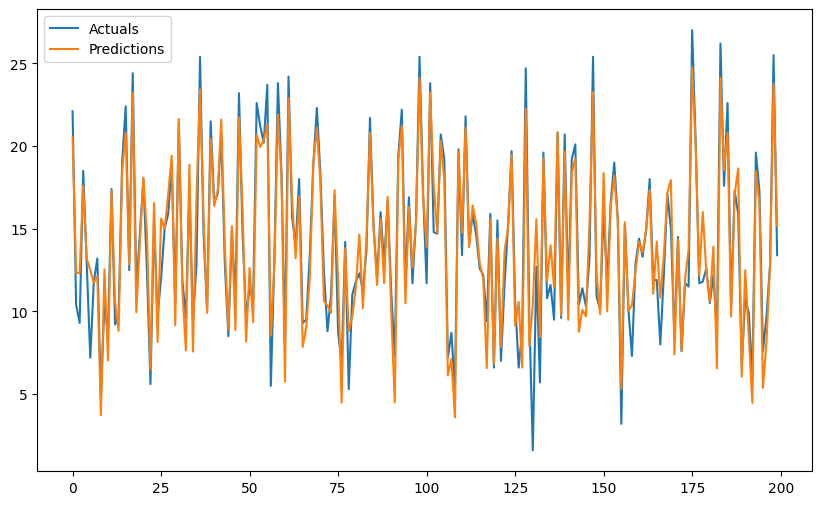

In [34]:
plt.figure(figsize=(10,6))
plt.plot(np.array(y),label='Actuals')
plt.plot(np.array(yhat),label='Predictions')
plt.legend(loc='best');

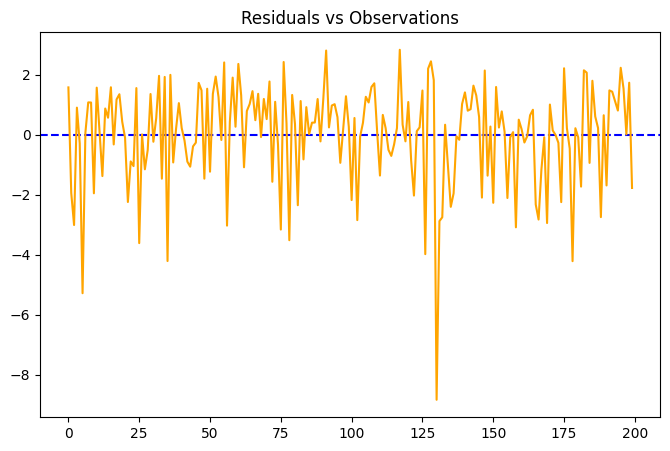

In [35]:
plt.figure(figsize=(8,5))
residuals = y-yhat
plt.title("Residuals vs Observations")
plt.axhline(y=0, color='b', linestyle='--')
plt.plot(np.array(residuals),color='orange');

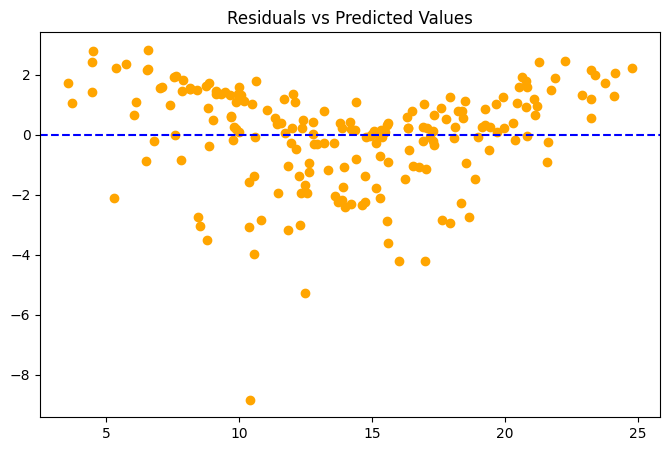

In [36]:
plt.figure(figsize=(8,5))
residuals = y-yhat
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='b', linestyle='--')
plt.scatter(np.array(yhat),np.array(residuals),color='orange');

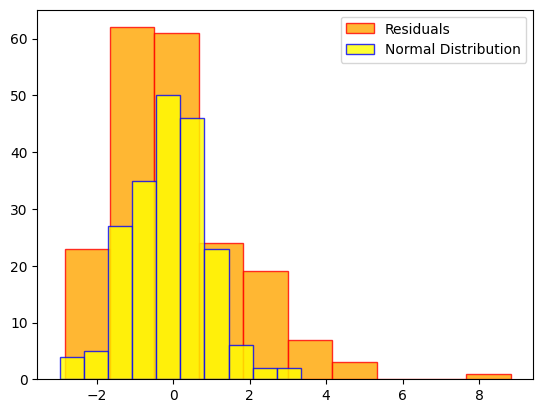

In [37]:
plt.hist(yhat-y,alpha=0.8,edgecolor='red',bins=10,color="orange",label="Residuals")
plt.hist(np.random.normal(size=200),alpha=0.8,edgecolor='blue',bins=10,color="yellow",label="Normal Distribution")
plt.legend(loc='best');